In [17]:
############### Libraries ###############
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
############### Data ###############
os.chdir('/Users/biancaorozco/Desktop/Metis/project3/heart_project3/data')
df = pd.read_csv('cleveland_data.csv')

df.head()

,age,gender,cpain,restbp,chol,bsugar,restecg,maxhr,exercisecp,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
############### Funcitons ###############
## Model F1 Scores
def test_model(model, X, y):
    Xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=33)
  
    kf = KFold(n_splits=5, shuffle=True, random_state=33)
    train_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring='f1')
    
    return np.mean(train_scores)


In [19]:
############### Cleaning Data ###############
## Replacing ? and empty values with NaNs
nan = np.nan
df.replace('?', value=nan, inplace=True)
# df.replace('', value=nan, inplace=True)

## Dropping rows with NaNs
# df.isna().sum()
df = df.dropna()
# df.isna().sum()

## Change string numbers to numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])
# df['target'] = pd.to_numeric(df['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 14 columns):
age           297 non-null int64
gender        297 non-null int64
cpain         297 non-null int64
restbp        297 non-null int64
chol          297 non-null int64
bsugar        297 non-null int64
restecg       297 non-null int64
maxhr         297 non-null int64
exercisecp    297 non-null int64
oldpeak       297 non-null float64
slope         297 non-null int64
ca            297 non-null int64
thal          297 non-null int64
target        297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [20]:
############### New Target ###############
target1 = np.minimum(df.target, 1)
df['target1'] = target1
df.tail()

,age,gender,cpain,restbp,chol,bsugar,restecg,maxhr,exercisecp,oldpeak,slope,ca,thal,target,target1
296,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,1
297,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,1
299,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1
300,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,1


In [21]:
############### Features/Target ###############
X, y = df.drop(['target', 'target1'], axis=1), df['target1']
X, y = np.array(X), np.array(y)

In [22]:
############### Modeling ###############
randomforest = RandomForestClassifier(n_estimators=300)
test_model(randomforest, X, y)

0.823155296209009

In [31]:
############### ROC ###############
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=33)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=.25, random_state=33)

print(Xval.shape)
Xval = pd.DataFrame(Xval)
Xval.head()

# randomforest.fit(Xtrain, ytrain)

fpr, tpr, thresholds = roc_curve(yval, randomforest.predict_proba(Xval))#[0:60,1])

# plt.plot(fpr, tpr,lw=2)
# plt.plot([0,1],[0,1],c='red',ls='--')
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])


# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC Curve for Heart Disease Prediction');
# print("ROC AUC score = ", roc_auc_score(yval, randomforest.predict_proba(Xval)[:,1]))

(60, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0
1,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0
2,47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0
3,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0
4,58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,0.0,7.0


ROC AUC score =  0.86


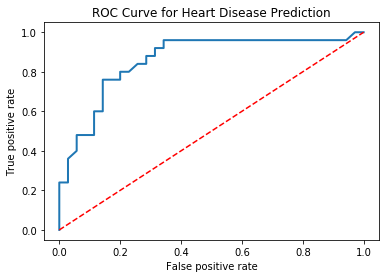

In [37]:
fpr, tpr, thresholds = roc_curve(yval, randomforest.predict_proba(Xval)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for Heart Disease Prediction');
print("ROC AUC score = ", roc_auc_score(yval, randomforest.predict_proba(Xval)[:,1]))

In [24]:
Xval.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [14]:
############### ROC ###############
logisticregression = LogisticRegression(C=100)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=33)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=.25, random_state=33)
# kf = KFold(n_splits=5, shuffle=True, random_state=33)
# train_scores = cross_val_score(randomforest, Xtrain, ytrain, cv=kf, scoring='f1')

logisticregression.fit(Xtrain, ytrain)

fpr, tpr, thresholds = roc_curve(yval, logisticregression.predict_proba(Xtrain)[:, ])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(yval, logisticregression.predict_proba(Xtest)[:,1]))

/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (60, 2)